## "Bike sharing Assignment"

### problem Statement :
   A us based Booming bike sharing company is suffered dips in to its revenue due to ongoing covid lockdown.so when the lockdown comes to an end company wants again growth and sustainbility in the market with help of mindfull business plan to accelerate its revenue and company wants to know which factors are affecting the demand of bike. 
   
###  The company wants to know:
  1.Which variables are significant in predicting the demand for shared bikes.
  
  2.How well those variables describe the bike demands.

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_data=pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####  there is no null values in any columns

### based on  looking of the  data dictionary  set we can drop some redundant/irrelevant columns for further analysis.

In [7]:
## 1. dteday is need to drop beacause we have separate month and year coloumns
## 2. casual and registered coloums are also need to drop because of redundt of cnt columns 
## 3. instant is also need to drop beacause of index  value not other information.

bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True) 


In [8]:
bike_data.shape

(730, 12)

In [9]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Eda,Data visulisation and  create dummy variabale

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
### we have 4 categorical coloumn  data type which we can convert its value into dummy vaules  
### mnth,weekday,weathersit,season  

In [12]:
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
bike_data['season']=bike_data['season'].astype('category')


In [13]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
bike_new_data=pd.get_dummies(data=bike_data ,drop_first=True)

In [15]:
bike_new_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
bike_new_data.shape

(730, 30)

In [17]:
bike_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

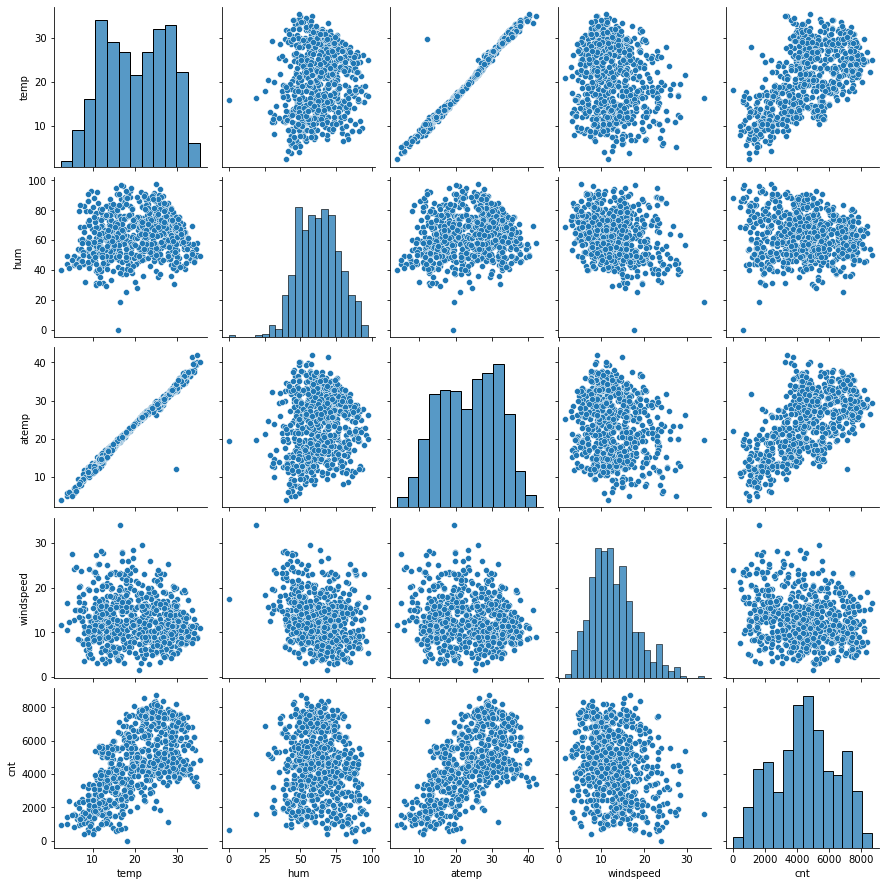

In [18]:
## relation of numerical data between them ,including  bivariate analysis 
sns.pairplot(bike_new_data,vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

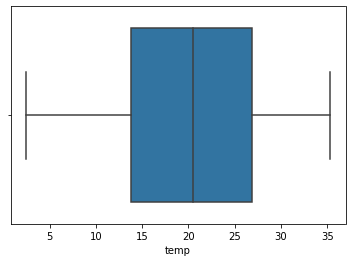

In [19]:
## Univariate analysis
sns.boxplot(bike_new_data['temp'])
plt.show()

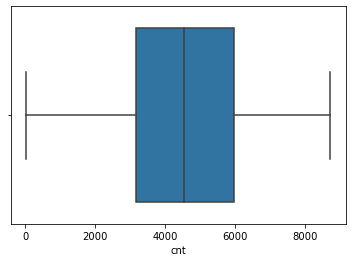

In [20]:
sns.boxplot(bike_new_data['cnt'])
plt.show()

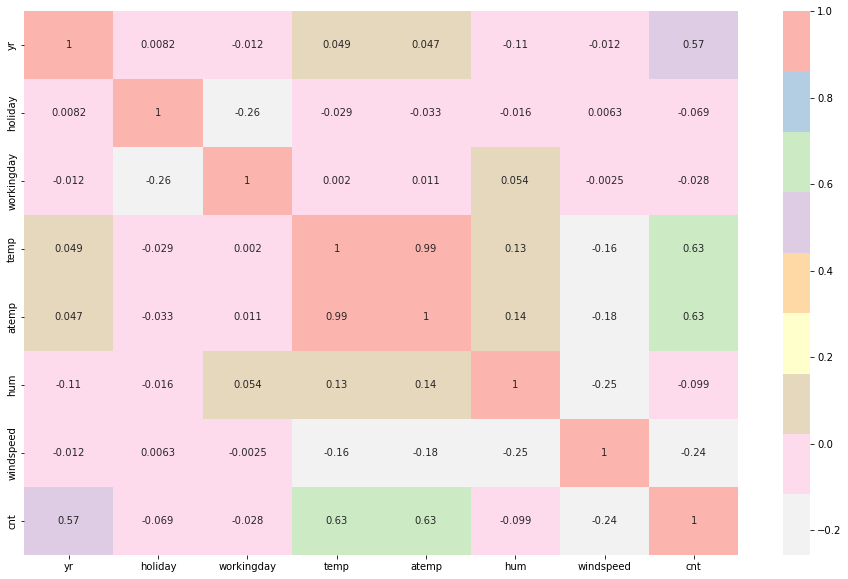

In [21]:
## corelation and multi variate analysis 
plt.figure(figsize=(16,10))
sns.heatmap(bike_data.corr(),annot=True,cmap='Pastel1_r')
plt.show()

## insights generate from pairplot and heatmap 

### 1.there is 0.99 linear relationship between atemp-temp,temp-atemp.
### 2.there is also 0.63 positive relationship between temp-cnt, atemp-cnt.
### 3. year and cnt variable has also 0.53 positive relation between them .
### 4. there is a high correlation between temp, atemp so we can skip as independent variable and considered multicolinearity 
### 5. there is a negative relation ship bwteeen cnt and hum ,windspeed but there is a good relation of cnt with other variable so we considered cnt as a target variables 

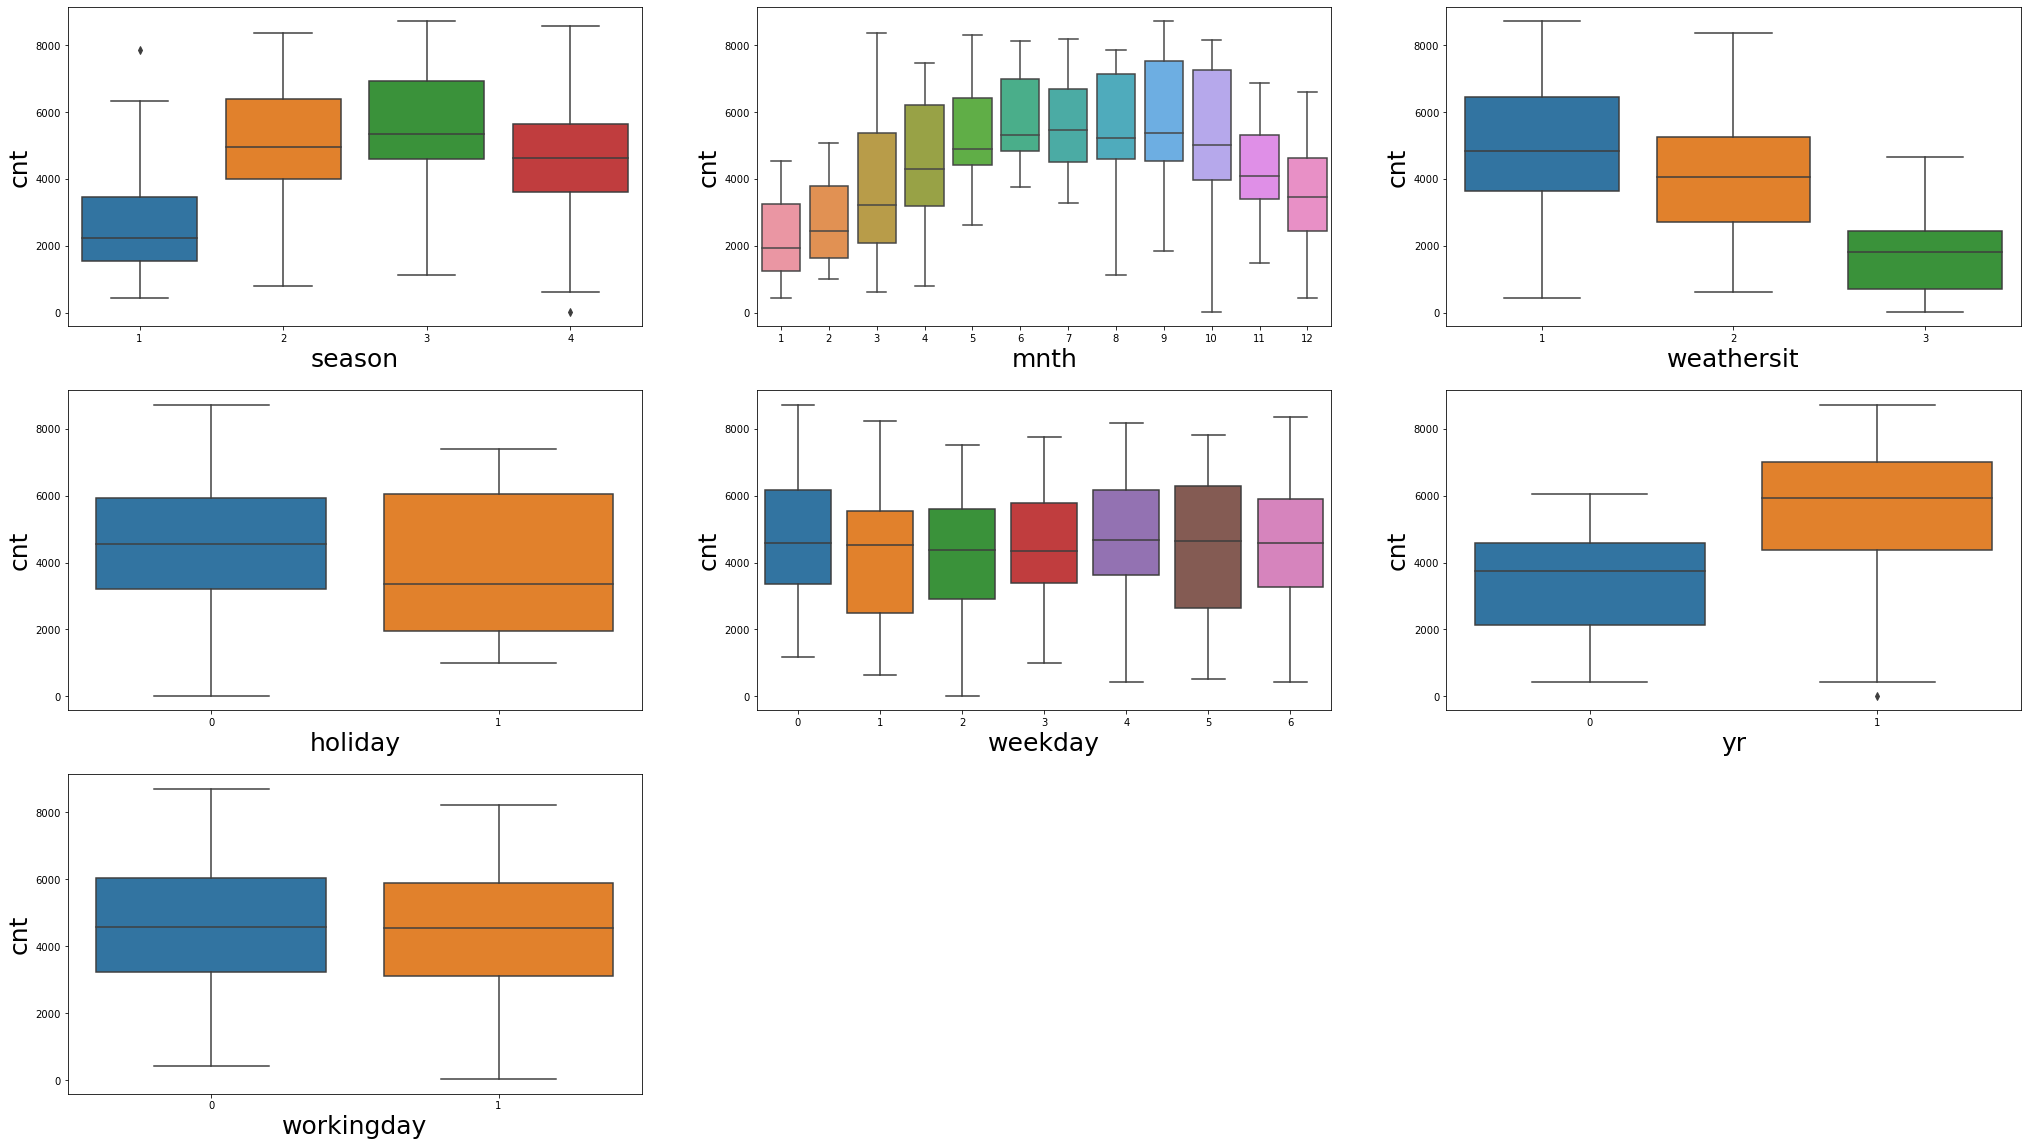

In [22]:
## analysis of categorical relationship between variable using boxplot 

plt.figure(figsize=(35,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.xlabel('season', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.xlabel('mnth', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.xlabel('weathersit', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.xlabel('holiday', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.xlabel('weekday', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.xlabel('yr', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.xlabel('workingday', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.show()



### insights:-
#### 1. season - most of the booking was happen in season 2,3  over 5000 booking,so it can be independent variable.
#### 2. mnth-  there is a more booking over 4000 in 5,6,7,8,9,10 month , so it can be also independent variables.
#### 3. weathersit-  most of the booking also happen in weathersit which is in 1 category of situation and over 4000 booking happen in 
####     2nd category of weather situation .so it can also be dependent variables.
#### 4. holiday-  most of the bike booking happen when it is not holiday 
#### 5. weekday-  this variable has show close trend (similar) in all days so  this variable hasnt affect on bike booking 
#### 6.  yr- in 2019  bike booking is more compare to 2018 so clearly its shows increment of booking in 2019.
#### 7. workingday - this variable has almost high percentage of data of booking in 2 yeras period in working days so it can be good predictor 

### Splitting the data (train - test data )

In [23]:
### split data in to 70:30 ratio
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(bike_new_data,train_size=0.70, test_size=0.30, random_state=100)

In [24]:
df_train.shape

(510, 30)

In [25]:
df_test.shape

(219, 30)

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0


## Rescaling the features 

In [27]:
## rescaling variables using minmax variabels 
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
### we apply this fuction on numerical column , but not binary column beacause of when we apply this feature we use interprtibility of those variales 

num_v=['temp','atemp','hum','windspeed','cnt']
df_train[num_v]=scaler.fit_transform(df_train[num_v])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### min value and max value of num_v variabels are between 0 to 1

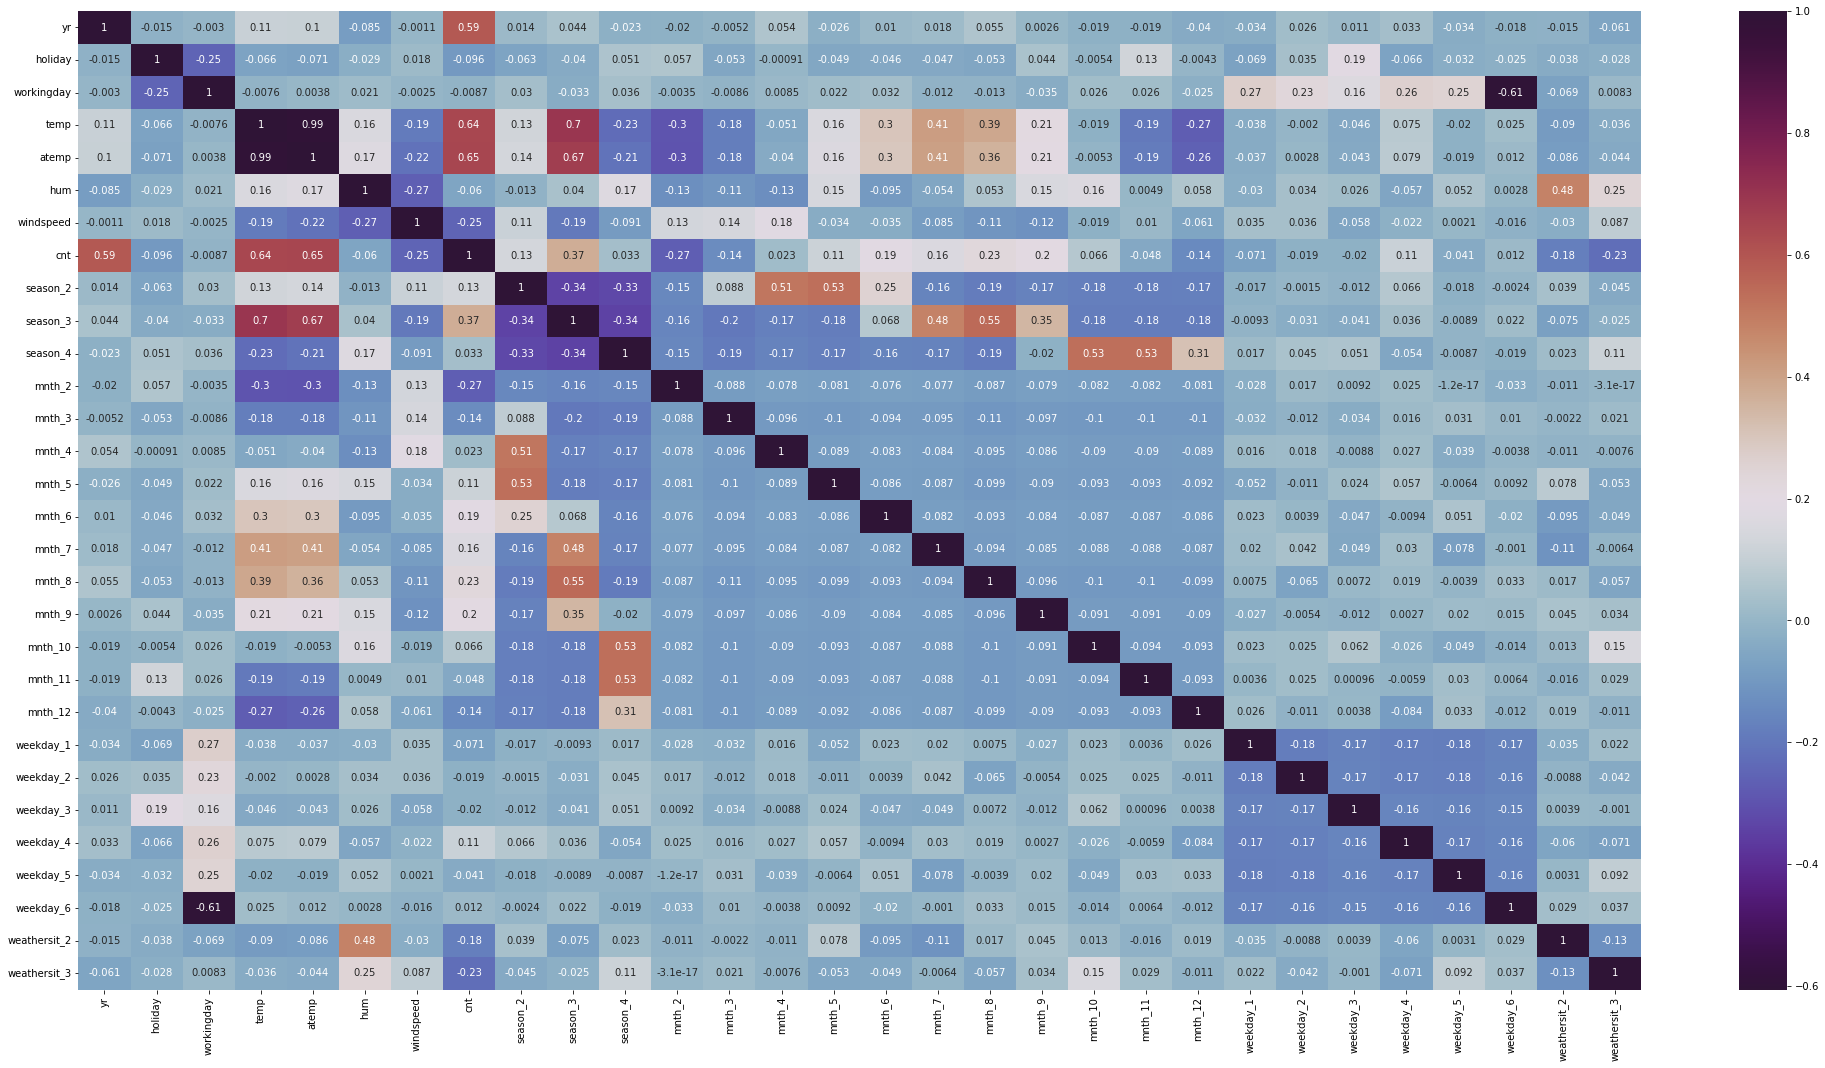

In [31]:
plt.figure(figsize = (35, 18))
sns.heatmap(df_train.corr(), annot = True, cmap='twilight_shifted')
plt.show()

### dividing x and y  for model building 

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
df_train.shape

(510, 29)

### training model using rfe and statsmodel 

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [36]:
rfe=RFE(lrm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [39]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [40]:
X_train_rfe = X_train[col]

In [41]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [42]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model 1

In [43]:
X_train_lrm1=sm.add_constant(X_train_rfe)
l_m_1=sm.OLS(y_train,X_train_lrm1).fit()
print(l_m_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.95e-189
Time:                        22:45:58   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

#### check vif values 

In [44]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3,8.80
4,windspeed,3.80
5,season_2,3.73
7,season_4,3.13
13,weathersit_2,2.15
0,yr,2.04
10,mnth_8,1.85
9,mnth_5,1.68


#### we can drop mnth 5 because it has high p value 

In [45]:
X_train_new1 = X_train_rfe.drop(['mnth_5'], axis = 1)

### model 2

In [46]:
X_train_lrm2=sm.add_constant(X_train_new1)
l_m_2=sm.OLS(y_train,X_train_lrm2).fit()
print(l_m_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          9.02e-190
Time:                        22:46:00   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2321      0.027      8.530   

In [47]:
vif=pd.DataFrame()
vif['Features']=X_train_new1.columns
vif['VIF']=[variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.01
3,hum,15.51
6,season_3,8.53
4,windspeed,3.73
5,season_2,3.51
7,season_4,3.07
12,weathersit_2,2.15
0,yr,2.03
9,mnth_8,1.85
11,mnth_10,1.64


### we will drop season_3 beacause it has high p value 

In [48]:
X_train_new2 = X_train_new1.drop(['season_3'], axis = 1)

### Model -3

In [49]:
X_train_lrm3=sm.add_constant(X_train_new2)
l_m_3=sm.OLS(y_train,X_train_lrm3).fit()
print(l_m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.26e-190
Time:                        22:46:05   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2324      0.027      8.529   

In [50]:
vif=pd.DataFrame()
vif['Features']=X_train_new2.columns
vif['VIF']=[variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,season_4,2.34
11,weathersit_2,2.14
0,yr,2.02
5,season_2,1.83
8,mnth_8,1.61
10,mnth_10,1.61
9,mnth_9,1.34


### droping 'mnth_3' column

In [51]:
X_train_new3 = X_train_new2.drop(['mnth_3'], axis = 1)

### model 4 

In [52]:
X_train_lrm4=sm.add_constant(X_train_new3)
l_m_4=sm.OLS(y_train,X_train_lrm4).fit()
print(l_m_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          6.02e-191
Time:                        22:46:09   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.848   

In [53]:
vif=pd.DataFrame()
vif['Features']=X_train_new3.columns
vif['VIF']=[variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_4,2.27
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.83
9,mnth_10,1.61
7,mnth_8,1.60
8,mnth_9,1.34


###  "hum" variable has high vif value then lets drop the variabels 

In [54]:
X_train_new4 = X_train_new3.drop(['hum'], axis = 1)

### Model 5

In [55]:
X_train_lrm5=sm.add_constant(X_train_new4)
l_m_5=sm.OLS(y_train,X_train_lrm5).fit()
print(l_m_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.21e-187
Time:                        22:46:12   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1355      0.017      8.079   

In [56]:
vif=pd.DataFrame()
vif['Features']=X_train_new4.columns
vif['VIF']=[variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.95
4,season_2,1.82
8,mnth_10,1.60
6,mnth_8,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.09


### we can 'mnth_10 ' beacause it has high p value 

In [57]:
X_train_new5 = X_train_new4.drop(['mnth_10'], axis = 1)

### model 6 

In [58]:
X_train_lrm6=sm.add_constant(X_train_new5)
l_m_6=sm.OLS(y_train,X_train_lrm6).fit()
print(l_m_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.26e-187
Time:                        22:46:16   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871   

In [59]:
vif=pd.DataFrame()
vif['Features']=X_train_new5.columns
vif['VIF']=[variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.81
6,mnth_8,1.58
5,season_4,1.49
8,weathersit_2,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


###  Drop mnth_8 because of p value 


In [60]:
X_train_new6 = X_train_new5.drop(['mnth_8'], axis = 1)

### model 7

In [61]:
X_train_lrm7=sm.add_constant(X_train_new6)
l_m_7=sm.OLS(y_train,X_train_lrm7).fit()
print(l_m_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.37e-186
Time:                        22:46:19   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1264      0.017      7.541   

In [62]:
vif=pd.DataFrame()
vif['Features']=X_train_new6.columns
vif['VIF']=[variance_inflation_factor(X_train_new6.values, i) for i in range(X_train_new6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_2,1.56
7,weathersit_2,1.48
5,season_4,1.38
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.03


## Final Model Insights :-

####  1. There is no multicollinearity between variables based on vif values.  
####  2.  All variabels is significant because of p value. 
####  3. F-statistic value is high so it indicates best model fit .
####  4. R-squared and adjusteR squared value is also show above 80% accuracy. 
####  5.  lowest AIC value is also best fit for model. 

##                           "Residual Analysis for train data set "

In [63]:
X_train_lrm7

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,1,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0


In [64]:
y_train_predicted = l_m_7.predict(X_train_lrm7)

Text(0, 0.5, 'y_train_predicted')

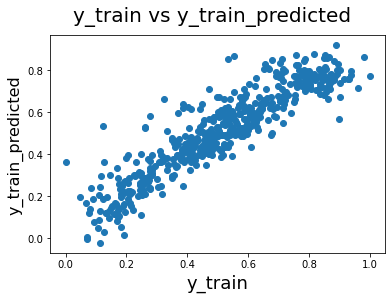

In [65]:
fig = plt.figure()
plt.scatter(y_train, y_train_predicted)
fig.suptitle('y_train vs y_train_predicted', fontsize = 20) 
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_train_predicted', fontsize = 16) 

### Normalitiy of errors

Text(0, 0.5, 'Density')

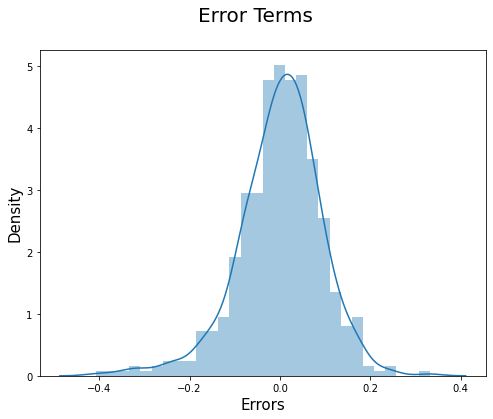

In [66]:
N_fig=plt.figure(figsize=(8,6))
sns.distplot((y_train-y_train_predicted),bins=30)
N_fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.ylabel('Density',fontsize=15)

#### hence data is normally distributed in distplot & distribuation is  mean value 0 .  

### Prediction using final model (test data set )

In [67]:
num_v=['temp','atemp','hum','windspeed','cnt']
df_test[num_v]=scaler.fit_transform(df_test[num_v])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df_test.shape

(219, 30)

### Dividing model into X_test and y_test 

In [70]:
y_test=df_test.pop('cnt')
X_test=df_test

In [71]:
## selecting final model 7 variabels in test data set 
col1 = X_train_new6.columns
X_test=X_test[col1]
X_test_lrm7=sm.add_constant(X_test)
X_test_lrm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [72]:
## Making prediction using final model 
y_test_predicted = l_m_7.predict(X_test_lrm7)

## Model Evaluation 

Text(0, 0.5, 'y_test_pred')

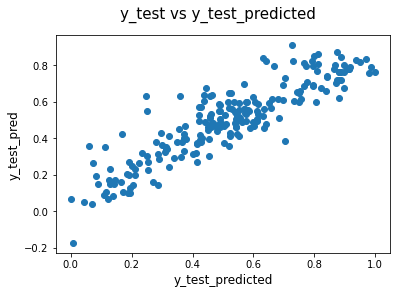

In [73]:
## ploting y_test ,y_test_predicted 
fig = plt.figure()
plt.scatter(y_test, y_test_predicted)
fig.suptitle('y_test vs y_test_predicted', fontsize = 15) 
plt.xlabel('y_test_predicted', fontsize = 12)
plt.ylabel('y_test_pred', fontsize = 12) 

### R-squared value test

In [74]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_predicted)
r2

0.7860370871256666

### Adjusted R2 matrics

In [75]:
n=X_test.shape[0]
p=X_test.shape[1]
AdjustedR2 = 1-(1-r2)*(n-1)/(n-p-1)
AdjustedR2

0.7768233731741402

### Final model equation 

#### cnt= 0.1264+(yr)*0.2328-(holiday)*0.0992+(temp)*0.5480-(windspeed)*0.1533+(season_2)*0.0868+(season_4)*0.1306+ 
#### (mnth_9)*0.1011-(weathersit_2)*0.0797-(weathersit_4)*0.2838

## insights of analysis 
### 1. temp, yr , sesaon_2,sesaon_4,mnth_9  based on their coefficient value unit increment increase bike demand 
### 2. holiday,windspeed,weathersit_2,weathersit_3 based on their negative coefficient sign indicates increment  bike demand decrease 